In [30]:
#load the data
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False

os.environ["LOKY_MAX_CPU_COUNT"] = "6"  # 根据你的 CPU 核心数调整
os.environ["OMP_NUM_THREADS"] = "1"    # 避免 Windows 上的内存泄漏

data = pd.read_csv('kmeans_data_1.csv')
data.head()

,V1,V2
0,12.295734,21.421274
1,6.087415,25.719901
2,17.221322,25.740510
3,2.585339,17.439023
4,16.253491,29.684942


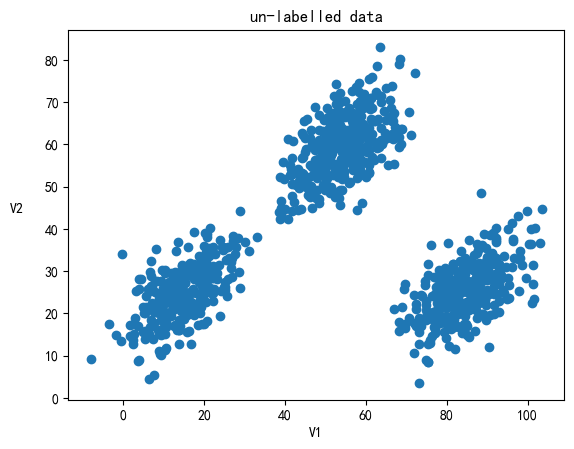

In [31]:
#define X and visualize the data
X = data[['V1','V2']]

%matplotlib inline
fig1 = plt.figure()
plt.scatter(X.loc[:, 'V1'],X.loc[:, 'V2'])
plt.title("un-labelled data")
plt.xlabel('V1')
plt.ylabel('V2', rotation=0, labelpad=20)
plt.show()

In [32]:
#set the model
from sklearn.cluster import KMeans
n_clusters = 3
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


D:\python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


属于簇：0
轮廓系数: 0.7477


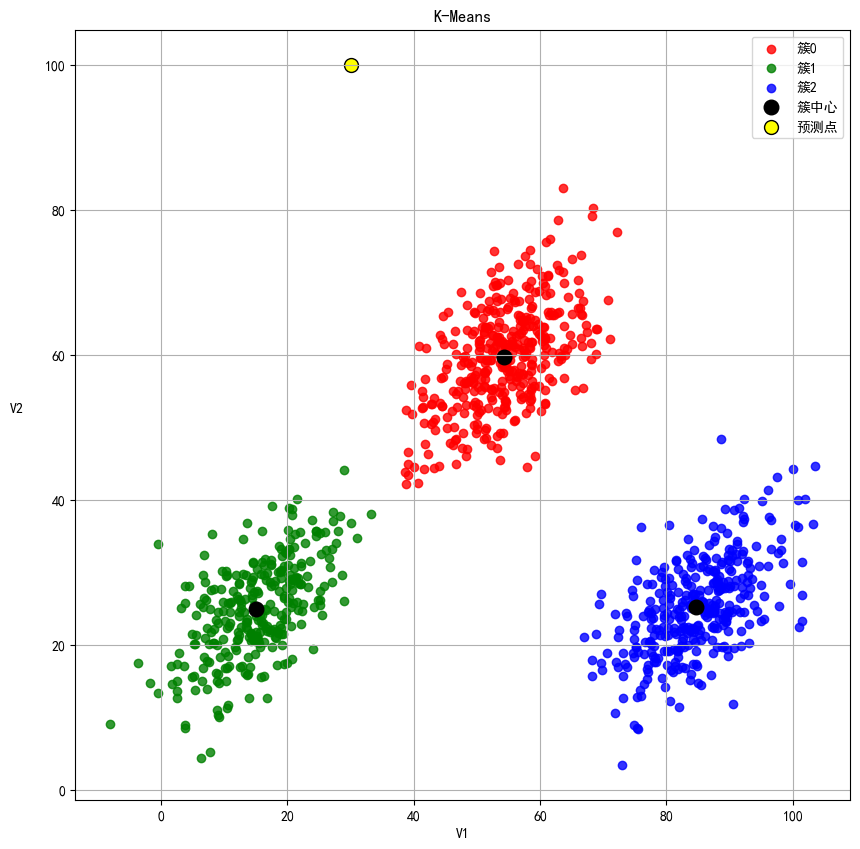

In [33]:
#establish labels, predict test, plot figures
predict_test = [[30, 100]]


cluster_labels = KM.labels_
data['label'] = cluster_labels
y = data['label']


cluster_label = KM.predict(predict_test)
print(f'属于簇：{cluster_label[0]}')

from sklearn.metrics import silhouette_score
silhouette_coefficient = silhouette_score(X, data['label'])
print(f'轮廓系数: {silhouette_coefficient:.4f}')

plt.figure(figsize=[10,10])
colors = ['red','green','blue']

for i in range(3):
    cluster_data = data[data['label'] == i]
    plt.scatter(cluster_data['V1'],cluster_data['V2'],
               c=colors[i],label=f'簇{i}',alpha=0.8)

centers = KM.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],
            c='black', s=110 ,alpha=1.0, label='簇中心')

plt.scatter(predict_test[0][0], predict_test[0][1], c='yellow', s=100, edgecolor='black', label='预测点')

plt.title('K-Means')
plt.xlabel('V1')
plt.ylabel('V2', rotation=0, labelpad=20)
plt.legend()
plt.grid(True)
plt.show()

In [39]:
print(type(data['label']))
print(data['label'].value_counts())

<class 'pandas.core.series.Series'>
label
0    401
2    350
1    299
Name: count, dtype: int64


In [34]:
#establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

y_predict_knn = KNN.predict(X)
y_predict_knn_test = KNN.predict([[80,60]])


print(y_predict_knn_test)
print('knn accuracy:',accuracy_score(y,y_predict_knn))

[0]
knn accuracy: 1.0


D:\python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


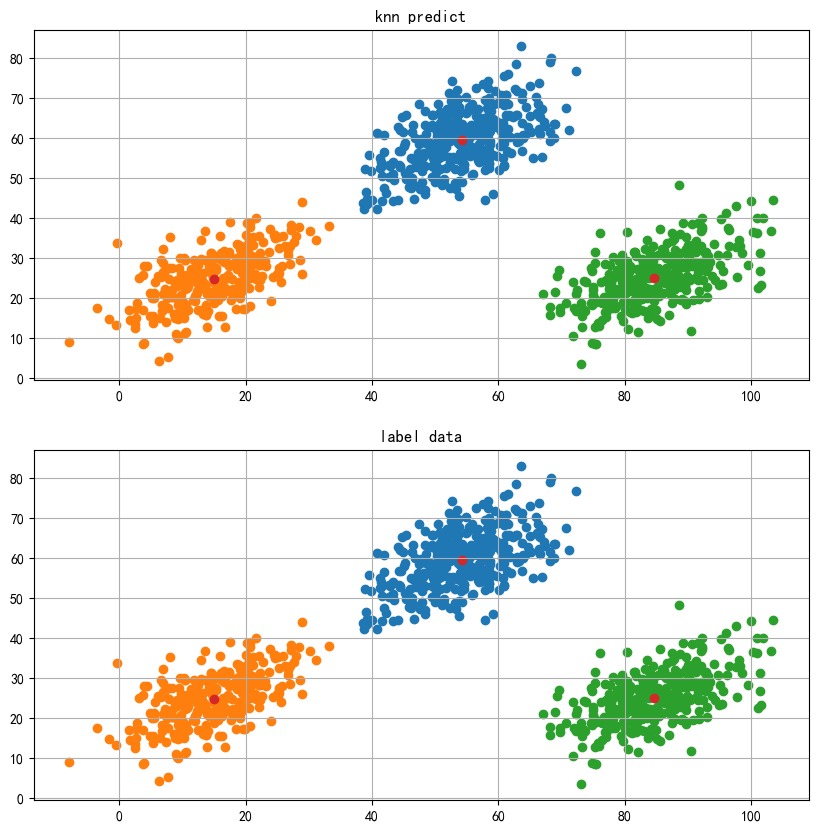

In [50]:
plt.figure(figsize=[10,10])
fig3 = plt.subplot(211)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_knn==0],X.loc[:,'V2'][y_predict_knn==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_knn==1],X.loc[:,'V2'][y_predict_knn==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_knn==2],X.loc[:,'V2'][y_predict_knn==2])
plt.title("knn predict")
plt.scatter(centers[:,0],centers[:,1])
plt.grid(True)


fig4 = plt.subplot(212)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.title("label data")
plt.scatter(centers[:,0],centers[:,1])
plt.grid(True)
plt.show()

In [56]:
#establish meanshift model
from sklearn.cluster import MeanShift,estimate_bandwidth
bw = estimate_bandwidth(X,n_samples=100)

ms = MeanShift(bandwidth=bw)
ms.fit(X)

,bandwidth,np.float64(23.287664618055427)
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


In [59]:
y_predict_ms = ms.predict(X)
print(pd.Series(y_predict_ms).value_counts())
print(type(y_predict_ms))

0    401
1    350
2    299
Name: count, dtype: int64
<class 'numpy.ndarray'>


kmeans/meanshift:un-supervised,training data:X
kmeans:category number;meanshift:calculate the bandwidth

knn:supervised,training data:X,y